## [MACHINE LEARNING] Aren Deza - 2019-50022 - HW2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

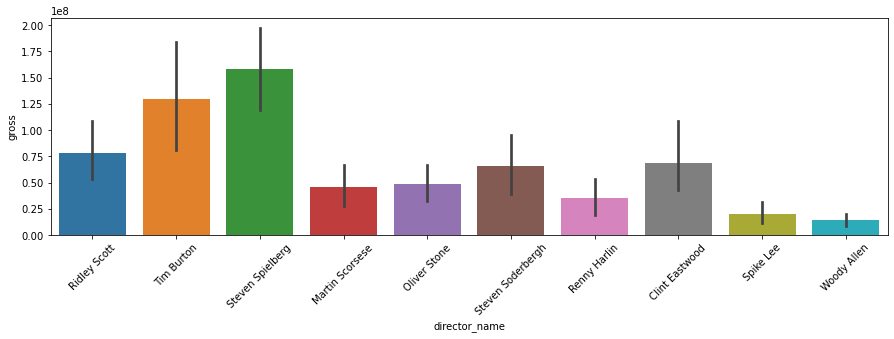

In [5]:
# creating a new dataframe containing the top 10 directors based on the number of times they appear
top10 = data.value_counts("director_name")[1:11]
top10 = top10.to_frame()
# merge inner with data to create a dataframe featuring just the top 10 directors
top10_directors = pd.merge(data, top10, on='director_name')

plt.figure(figsize=(15,4))
sns.barplot(x="director_name", y="gross", data=top10_directors)
plt.xticks(rotation=45)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

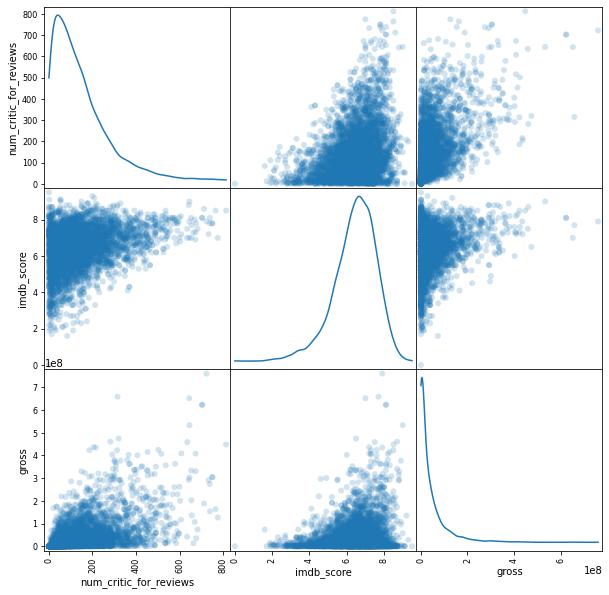

In [6]:
from pandas.plotting import scatter_matrix

# creating a scatter matrix to display three variables in one graph
cols = ["num_critic_for_reviews", "imdb_score", "gross"]
scatter_matrix(data[cols], alpha=0.2, figsize=(10,10), 
               diagonal='kde', marker='o')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
z = data['gross']-data['budget']
data['sales'] = z

# shows us that we now have 30 columns, including sales and average_actor_likes
data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'sales'],
      dtype='object')

## Which directors garnered the most total sales?

In [8]:
# group by directors, then sum all data pertaining to each director
directors = data.groupby("director_name").sum()
# arrange in descending order
i = directors.sort_values(by="sales", ascending = False)

i[['sales']][:10]

,sales
director_name,
Steven Spielberg,2.451332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
Peter Jackson,9.009693e+08
Tim Burton,8.242755e+08
Christopher Nolan,8.082276e+08
Jon Favreau,7.693815e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

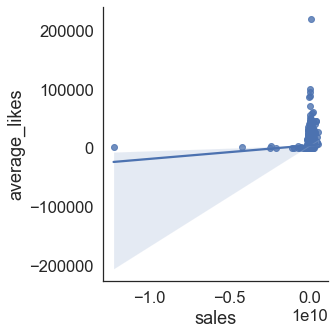

In [9]:
# Average of all columns that include likes
z = (data['director_facebook_likes'] + data['cast_total_facebook_likes'] + data['movie_facebook_likes'] + data['actor_1_facebook_likes'] + data['actor_2_facebook_likes'] + data['actor_3_facebook_likes'])/6
data['average_likes'] = z

sns.set(font_scale=1.5,style="white")
sns.lmplot(x="sales",y="average_likes",data=data)
plt.show()

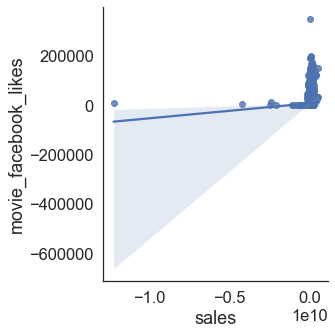

In [10]:
# Only movie facebook likes
del data['average_likes']

sns.set(font_scale=1.5,style="white")
sns.lmplot(x="sales",y="movie_facebook_likes",data=data)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [11]:
# creating new columns that contain the indices of the genres we're looking for
# if the genre is not present in the movie, the index will be -1
data['Romance'] = data['genres'].str.find('Romance')
data['Comedy'] = data['genres'].str.find('Comedy')
data['Action'] = data['genres'].str.find('Action')
data['Fantasy'] = data['genres'].str.find('Fantasy')

<AxesSubplot:xlabel='sales', ylabel='Density'>

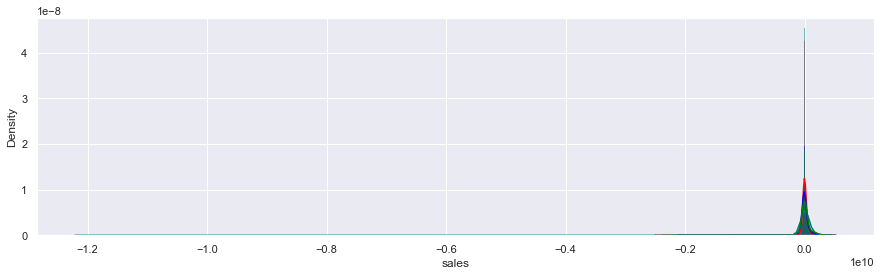

In [12]:
# Counting all movies that contain the listed genres as one of their genres

ax = sns.set(rc={"figure.figsize":(15, 4)})
sns.histplot(data[data['Romance'] > -1]["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['Comedy'] > -1]["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['Action'] > -1]["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['Fantasy'] > -1]["sales"], color="green", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)

<AxesSubplot:xlabel='sales', ylabel='Density'>

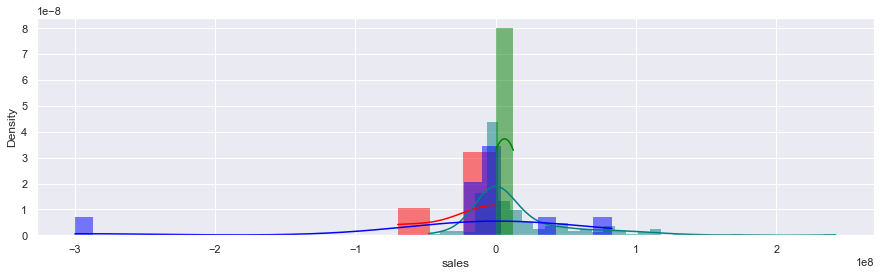

In [13]:
# Only counting movies that are exclusively of the genres listed

# deleting unecessary columns
del data['Romance']
del data['Comedy']
del data['Action']
del data['Fantasy']

# Creating the same plot, but using only movies whose genres are x, and x alone
ax = sns.set(rc={"figure.figsize":(15, 4)})
sns.histplot(data[data['genres'] == "Romance"]["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == "Comedy"]["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == "Action"]["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == "Fantasy"]["sales"], color="green", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [14]:
# creating variable z containing averages of each actor's facebook likes
z = (data['actor_1_facebook_likes'] + data['actor_2_facebook_likes'] + data['actor_3_facebook_likes'])/3
# save z under new column 'average_actor_likes'
data['average_actor_likes'] = z

data[['movie_title', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']][:5]

,movie_title,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,average_actor_likes
0,b'Avatar',1000.0,936.0,855.0,930.333333
1,"b""Pirates of the Caribbean: At World's End""",40000.0,5000.0,1000.0,15333.333333
2,b'Spectre',11000.0,393.0,161.0,3851.333333
3,b'The Dark Knight Rises',27000.0,23000.0,23000.0,24333.333333
4,b'Star Wars: Episode VII - The Force Awakens ...,131.0,12.0,0.0,47.666667


## Copying the whole dataframe

In [15]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [16]:
# checking what are the specific dtypes of each column.
# results show that we have 'int64' and 'float64'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5044 non-null   int64  
 1   movie_title                5044 non-null   object 
 2   color                      5044 non-null   object 
 3   director_name              5044 non-null   object 
 4   num_critic_for_reviews     5044 non-null   float64
 5   duration                   5044 non-null   float64
 6   director_facebook_likes    5044 non-null   float64
 7   actor_3_facebook_likes     5044 non-null   float64
 8   actor_2_name               5044 non-null   object 
 9   actor_1_facebook_likes     5044 non-null   float64
 10  gross                      5044 non-null   float64
 11  genres                     5044 non-null   object 
 12  actor_1_name               5044 non-null   object 
 13  num_voted_users            5044 non-null   float

In [17]:
# iterating over each column
for name, values in df.iteritems():
    if df.dtypes[name] == 'float64' or df.dtypes[name] == 'int64':
        # if column dtype is float or int, perform min-max normalization
        df[name] = (df[name] - df[name].min()) / (df[name].max() - df[name].min())
        
df[:5]

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218


In [ ]:
# data is now normalized.